<a href="https://colab.research.google.com/github/shahriar00/Deep-Learning/blob/main/HandWrittenRecognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values (0-1)
x_train = x_train.reshape(-1, 28, 28, 1)  # Reshape to (28,28,1) for CNN
x_test = x_test.reshape(-1, 28, 28, 1)


In [4]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), # Conv Layer 1
    keras.layers.MaxPooling2D(2,2),  # Pooling Layer 1
    keras.layers.Conv2D(64, (3,3), activation='relu'), # Conv Layer 2
    keras.layers.MaxPooling2D(2,2),  # Pooling Layer 2
    keras.layers.Flatten(),  # Flatten layer
    keras.layers.Dense(128, activation='relu'),  # Fully Connected Layer
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.9138 - loss: 0.2822 - val_accuracy: 0.9758 - val_loss: 0.0721
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9847 - loss: 0.0484 - val_accuracy: 0.9880 - val_loss: 0.0378
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9901 - loss: 0.0325 - val_accuracy: 0.9887 - val_loss: 0.0370
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 31ms/step - accuracy: 0.9939 - loss: 0.0194 - val_accuracy: 0.9891 - val_loss: 0.0343
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9954 - loss: 0.0150 - val_accuracy: 0.9905 - val_loss: 0.0300


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9870 - loss: 0.0397

Test Accuracy: 0.9905


In [8]:
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


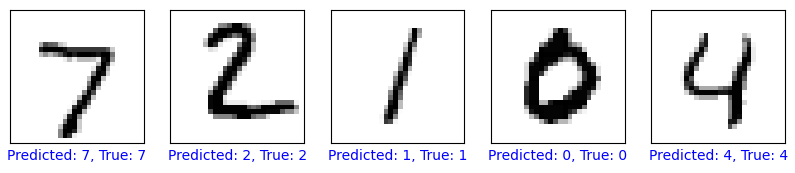

In [9]:
def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"Predicted: {predicted_label}, True: {true_label}", color=color)

plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plot_image(i, predictions[i], y_test[i], x_test[i].reshape(28,28))
plt.show()


In [10]:
model.save("mnist_cnn_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


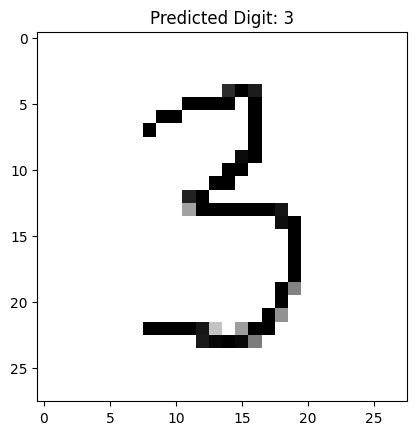

In [11]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model("mnist_cnn_model.h5")  # Make sure to save your model first

# Step 1: Load and preprocess your own handwritten digit
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    img = cv2.resize(img, (28, 28))  # Resize to 28x28
    img = cv2.bitwise_not(img)  # Invert colors (black to white, white to black)
    img = img / 255.0  # Normalize (0-1)
    img = img.reshape(1, 28, 28, 1)  # Reshape for CNN input
    return img

# Step 2: Predict using the trained model
image_path = "/content/three.png"  # Change this to your image file
processed_img = preprocess_image(image_path)
prediction = model.predict(processed_img)

# Step 3: Display the result
predicted_digit = np.argmax(prediction)
plt.imshow(processed_img.reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Predicted Digit: {predicted_digit}")
plt.show()
